In [1]:
# Importing all libaries needed
import sklearn.datasets as dset
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Setting up the parameter of the model
param_dict = {
    'num_data_samples': 3,
    'noise': 1000,
    'learning_rate': 1e-2,
    'num_epochs': 800,
    'num_features': 4
}

In [3]:
x,y = dset.make_regression(n_samples=param_dict['num_data_samples'], n_features=1, noise=param_dict['noise'])
y /= 500  # Scaling y 

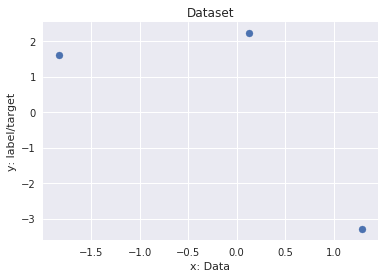

In [4]:
# Visualizing the dataset
plt.scatter(x[:,0],y)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

${\Phi(x)_j} = e^{\frac{-|x-\mu_j|^2}{2s}}$

In [5]:
# Gaussian radial basis function
def gaussian_kernel(x, mu, sigma):
    return np.exp(-np.square(x-mu)/(2*np.sqrt(sigma)))

In [6]:
mu = np.array((-1,-0.5,0,0.5,1))
x_0 = np.ones_like(x)
x_1 = gaussian_kernel(x, mu[0],0.2)
x_2 = gaussian_kernel(x, mu[1],0.2)
x_3 = gaussian_kernel(x, mu[2],0.2)
x_4 = gaussian_kernel(x, mu[3],0.2)
x_5 = gaussian_kernel(x, mu[4],0.2)
x_rbf = np.hstack((x_0, x_1,x_2,x_3,x_4,x_5 ))

In [7]:
w = 0.1 * np.ones(x_rbf.shape[1])
w = w[:,None]
w.shape

(6, 1)

In [8]:
# Mean Squared Error Loss
def MSE_loss(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) # Linear transformation
    loss = 0.5 * np.sum(np.square(y_pred-y), axis=0) 
    return loss

# Stochstic Gradient Descent
def optimzer(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) 
    dW = np.sum((y_pred - y)[:,None]*x , axis=0)
    w -= learning_rate*dW[:,None]
    return w

In [9]:
learning_rate = param_dict['learning_rate']
loss_list = []
# Training the model:
for i in range(param_dict['num_epochs']):
    loss = MSE_loss(x_rbf,w,y)
    loss_list.append(loss)
    w = optimzer(x_rbf,w,y)

In [10]:
x_plot = np.linspace(-2,2,100)
def kernel_regression_plot(x, w, mu):
    y = w[0] * np.ones(x.shape[0])
    
    M = w.shape[0]-1
    for i in range(M):
        y += w[i+1] * gaussian_kernel(x, mu[i], 0.2)
        
    return y
        
    

In [11]:
y_plot = kernel_regression_plot(x_plot, w, mu)

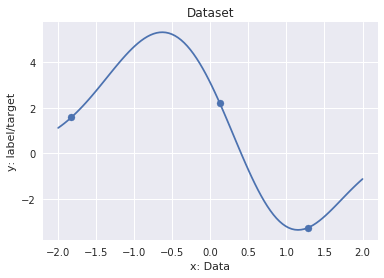

In [12]:
# Visualizing the dataset
plt.scatter(x,y)
plt.plot(x_plot,y_plot)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

In [13]:
loss_list[-1]

0.0009416818408136388

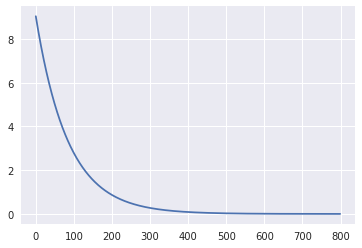

In [14]:
plt.plot(range(len(loss_list)),loss_list)
